<a href="https://colab.research.google.com/github/NahimaTrisha/Data-visualization-with-Python/blob/main/audi_used_car_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


In [ ]:
def separate_num_cols(dataframe):

    # create an empty list to keep the numeric columns
    num_cols = []

    # create a for loop to check the data types of all columns
    for col in dataframe.columns:
        if (dataframe[col].dtypes == 'int64') | (dataframe[col].dtypes == 'float64'):
            num_cols.append(col)
        
        
    return num_cols

In [ ]:
def separate_obj_cols(dataframe):

    # create an empty list to keep the object columns
    obj_cols = []

    # create a for loop to check the data types of all columns
    for col in dataframe.columns:
        if (dataframe[col].dtypes != 'int64') and (dataframe[col].dtypes != 'float64'):
            obj_cols.append(col)
        
        
    return obj_cols

In [ ]:
numeric_cols = separate_num_cols(df)

print(numeric_cols)

['year', 'price', 'mileage', 'mpg', 'engineSize']


In [ ]:
object_cols = separate_obj_cols(df)

print(object_cols)

['model', 'transmission', 'fuelType']


In [ ]:
df.shape

(10668, 8)

In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

In [ ]:
df["year"].value_counts()

2019    3197
2016    1964
2017    1935
2015     999
2018     864
2020     716
2014     447
2013     291
2012      85
2011      47
2010      32
2009      23
2008      21
2007      16
2006       9
2005       7
2003       6
2004       5
2002       2
1997       1
1998       1
Name: year, dtype: int64

In [ ]:
df["model"].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

In [ ]:
df['transmission'].value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [ ]:
df['fuelType'].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [ ]:
fuelType_count = df['fuelType'].value_counts()

fuelType_count = pd.DataFrame(fuelType_count)

fuelType_count = fuelType_count.reset_index()

fuelType_count = fuelType_count.rename(columns={'index':'fuel_type', 'fuelType':'No_of_cars'})


fuelType_count['% of cars'] = np.round(((fuelType_count['No_of_cars']/fuelType_count['No_of_cars'].sum())*100))
display(fuelType_count)



,fuel_type,No_of_cars,% of cars
0,Diesel,5577,52.0
1,Petrol,5063,47.0
2,Hybrid,28,0.0


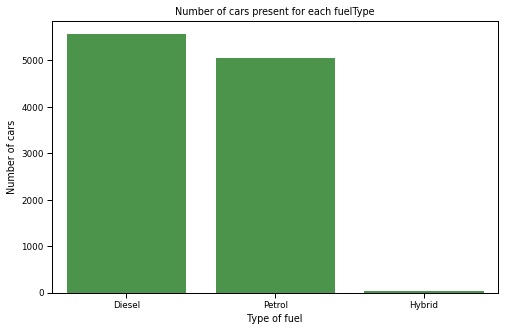

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='fuel_type', y='No_of_cars', data=fuelType_count, color='green', alpha=0.75)
plt.title("Number of cars present for each fuelType")
plt.xlabel("Type of fuel")
plt.ylabel("Number of cars")
plt.show()

In [ ]:
transmission_count = df['transmission'].value_counts()

transmission_count = pd.DataFrame(transmission_count)

transmission_count = transmission_count.reset_index()

transmission_count = transmission_count.rename(columns={'index':'transmission', 'transmission':'No_of_cars'})

transmission_count['% of cars'] = np.round(((transmission_count['No_of_cars']/transmission_count['No_of_cars'].sum())*100), 2)
display(transmission_count)

,transmission,No_of_cars,% of cars
0,Manual,4369,40.95
1,Semi-Auto,3591,33.66
2,Automatic,2708,25.38


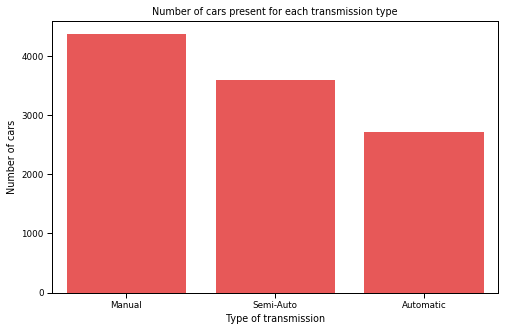

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='transmission', y='No_of_cars', data=transmission_count, color='red', alpha=0.75)
plt.title("Number of cars present for each transmission type")
plt.xlabel("Type of transmission")
plt.ylabel("Number of cars")
plt.show()

In [ ]:
model_count = df['model'].value_counts()

model_count = pd.DataFrame(model_count)

model_count = model_count.reset_index()

model_count = model_count.rename(columns={'index':'model', 'model':'No_of_cars'})

model_count['% of cars'] = np.round(((model_count['No_of_cars']/model_count['No_of_cars'].sum())*100), 2)
display(model_count)

,model,No_of_cars,% of cars
0,A3,1929,18.08
1,Q3,1417,13.28
2,A4,1381,12.95
3,A1,1347,12.63
4,A5,882,8.27
5,Q5,877,8.22
6,Q2,822,7.71
7,A6,748,7.01
8,Q7,397,3.72
9,TT,336,3.15


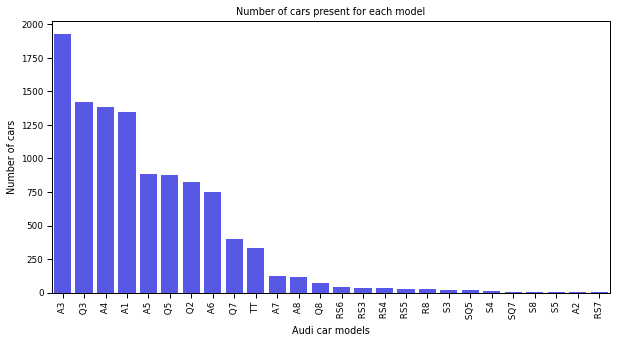

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='model', y='No_of_cars', data=model_count, color='blue', alpha=0.75)
plt.title("Number of cars present for each model")
plt.xlabel("Audi car models")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)
plt.show()

In [ ]:
year_count = df['year'].value_counts()

year_count = pd.DataFrame(year_count)

year_count = year_count.reset_index()

year_count = year_count.rename(columns={'index':'year', 'year':'No_of_cars'})

year_count['% of cars'] = np.round(((year_count['No_of_cars']/year_count['No_of_cars'].sum())*100), 2)
display(year_count)

,year,No_of_cars,% of cars
0,2019,3197,29.97
1,2016,1964,18.41
2,2017,1935,18.14
3,2015,999,9.36
4,2018,864,8.10
5,2020,716,6.71
6,2014,447,4.19
7,2013,291,2.73
8,2012,85,0.80
9,2011,47,0.44


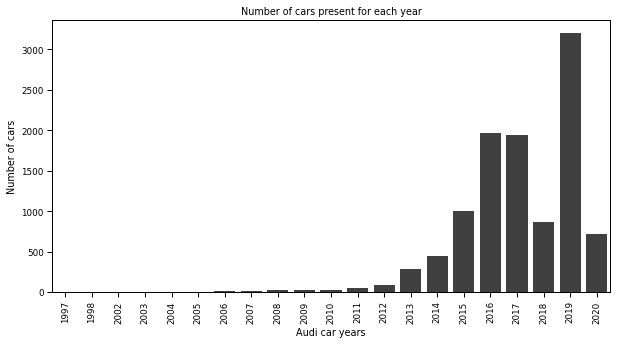

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='year', y='No_of_cars', data=year_count, color='black', alpha=0.75)
plt.title("Number of cars present for each year")
plt.xlabel("Audi car years")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)
plt.show()

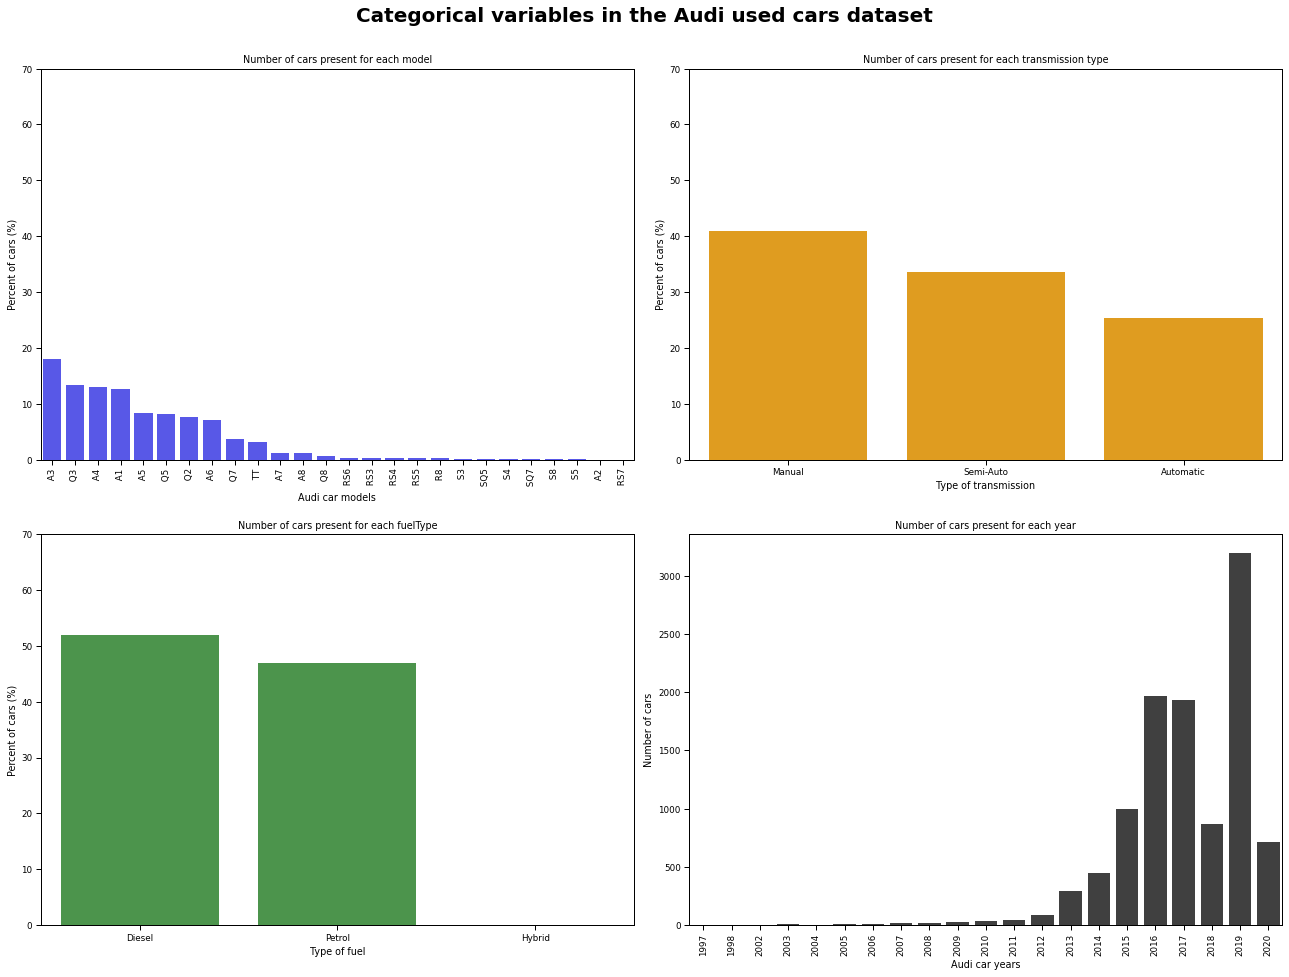

In [ ]:
sns.set_context('paper')

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
sns.barplot(x='model', y='% of cars', data=model_count, color='blue', alpha=0.75)
plt.title("Number of cars present for each model")
plt.xlabel("Audi car models")
plt.ylabel("Percent of cars (%)")
plt.xticks(rotation=90)
plt.yticks(np.arange(0,71,10).tolist())

plt.subplot(2,2,2)
sns.barplot(x='transmission', y='% of cars', data=transmission_count, color='orange')
plt.title("Number of cars present for each transmission type")
plt.xlabel("Type of transmission")
plt.ylabel("Percent of cars (%)")
plt.yticks(np.arange(0,71,10).tolist())

plt.subplot(2,2,3)
sns.barplot(x='fuel_type', y='% of cars', data=fuelType_count, color='green', alpha=0.75)
plt.title("Number of cars present for each fuelType")
plt.xlabel("Type of fuel")
plt.ylabel("Percent of cars (%)")
plt.yticks(np.arange(0,71,10).tolist())

plt.subplot(2,2,4)
sns.barplot(x='year', y='No_of_cars', data=year_count, color='black', alpha=0.75)
plt.title("Number of cars present for each year")
plt.xlabel("Audi car years")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)

plt.suptitle("Categorical variables in the Audi used cars dataset", fontsize=20, y=1.04, fontweight=700)

plt.tight_layout(h_pad=1.8)
plt.show()

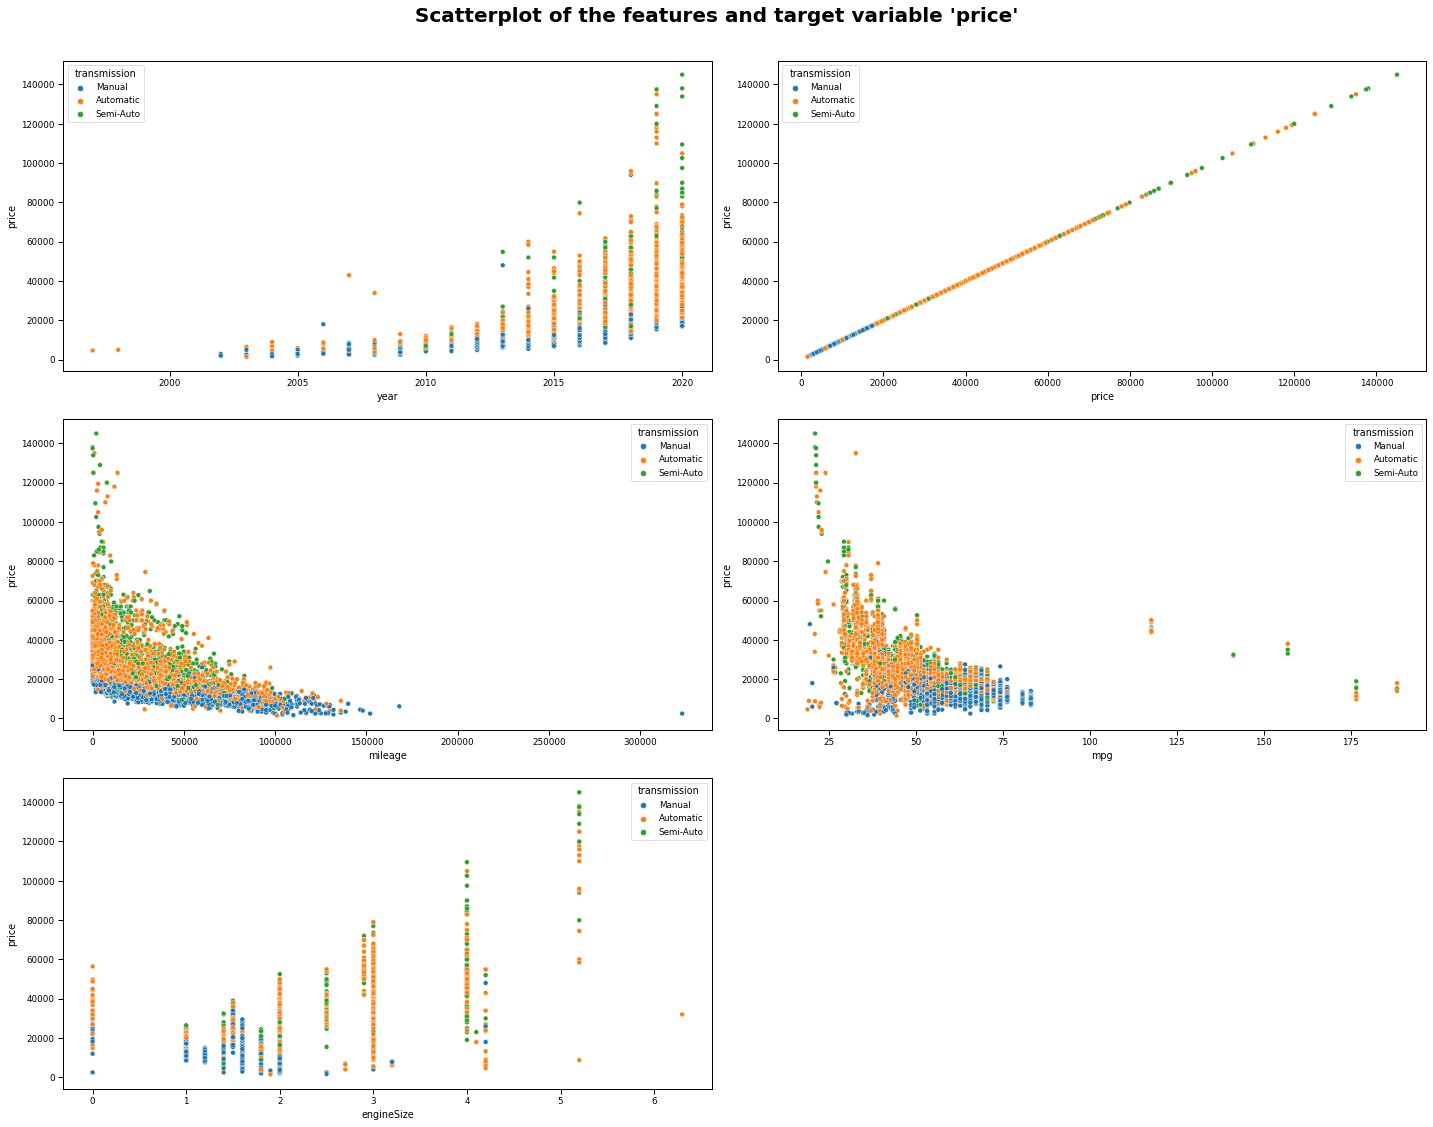

In [ ]:
plt.figure(figsize=(20,15))

for index in range(len(numeric_cols)):
    plt.subplot(3,2,index+1)
    sns.scatterplot(x=df[numeric_cols[index]], y='price', data=df, hue='transmission')
    
plt.suptitle("Scatterplot of the features and target variable 'price'",fontsize=20, y=1.04, fontweight=700)
plt.tight_layout(h_pad=1.8)
plt.show()


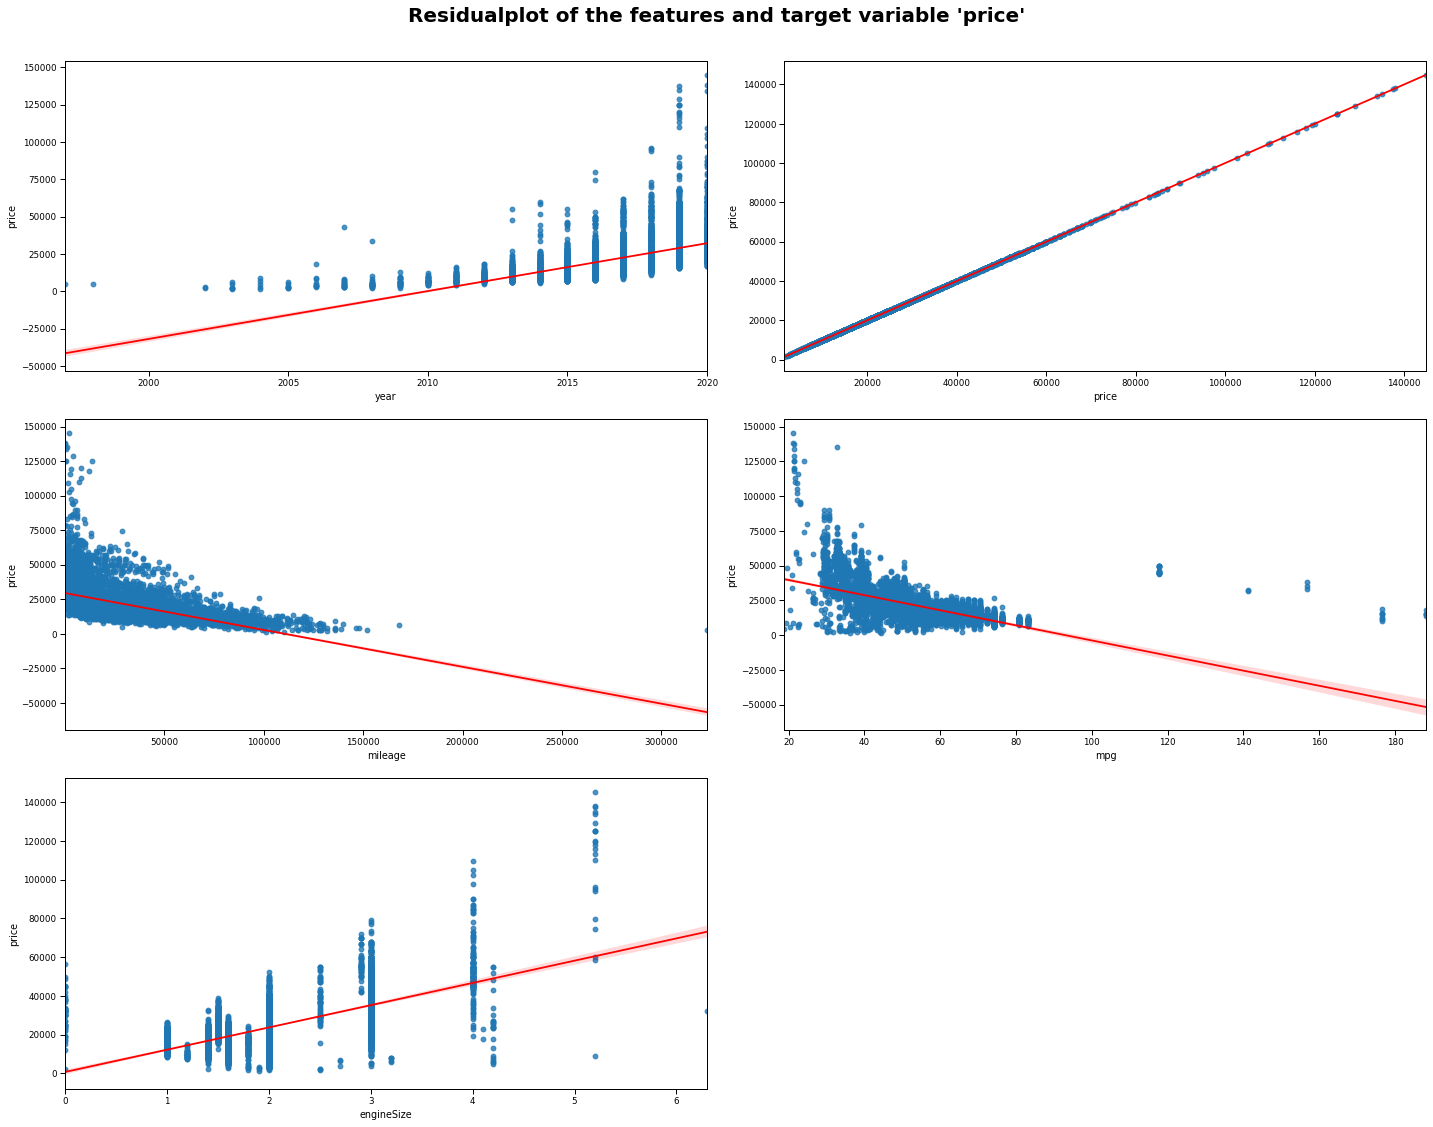

In [ ]:
plt.figure(figsize=(20,15))

for index in range(len(numeric_cols)):
    plt.subplot(3,2,index+1)
    sns.regplot(x=df[numeric_cols[index]], y='price', data=df, line_kws={'color':'r'})

plt.suptitle("Residualplot of the features and target variable 'price'",fontsize=20, y=1.04, fontweight=700)
plt.tight_layout(h_pad=1.8)
plt.show()


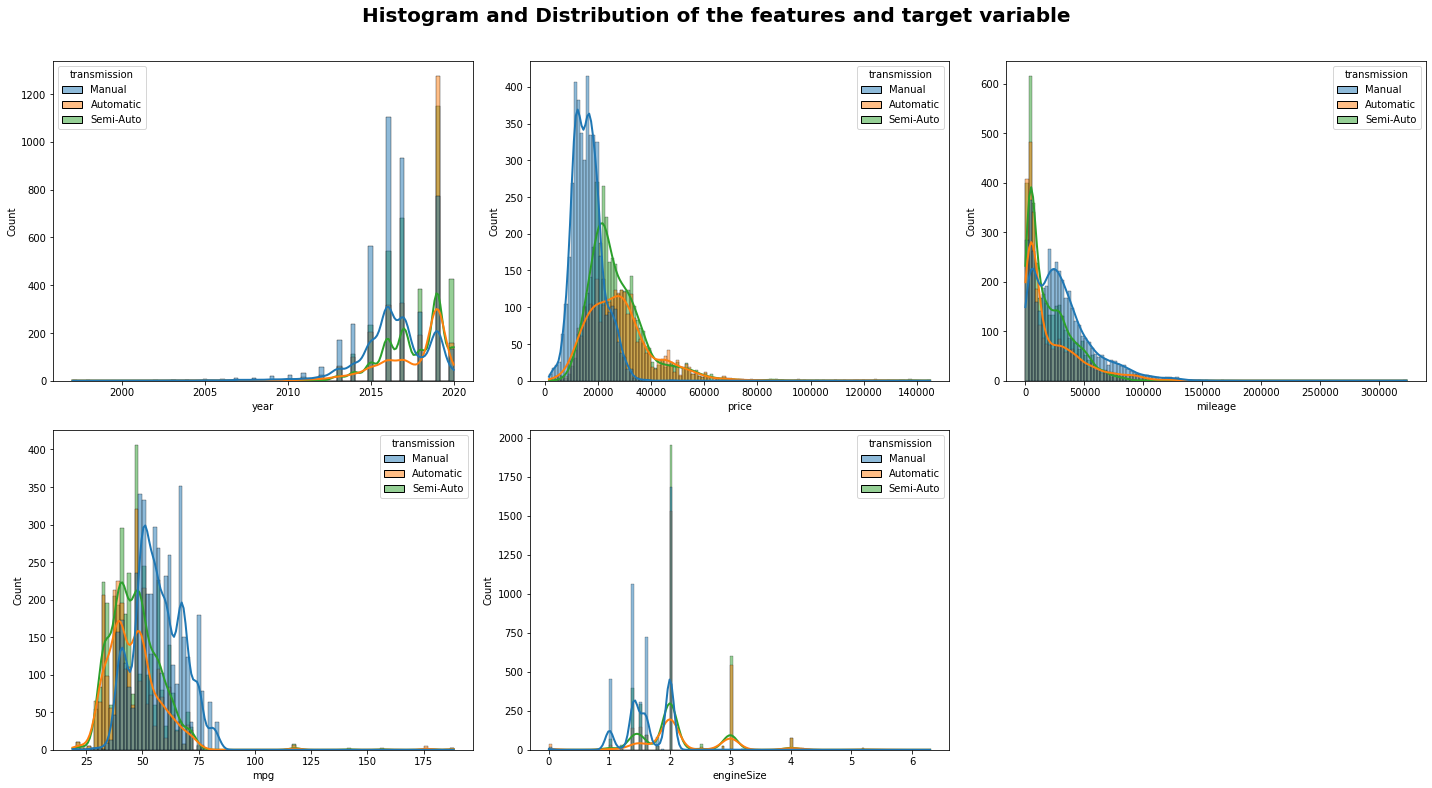

In [ ]:
plt.figure(figsize=(20,15))

for index in range(len(numeric_cols)):
    plt.subplot(3,3,index+1)
    sns.histplot(data=df, x=df[numeric_cols[index]], hue='transmission', kde= True, line_kws={"linewidth":2})


plt.suptitle("Histogram and Distribution of the features and target variable",fontsize=20, y=1.04, fontweight=700)
plt.tight_layout(h_pad=1.8)
plt.show()

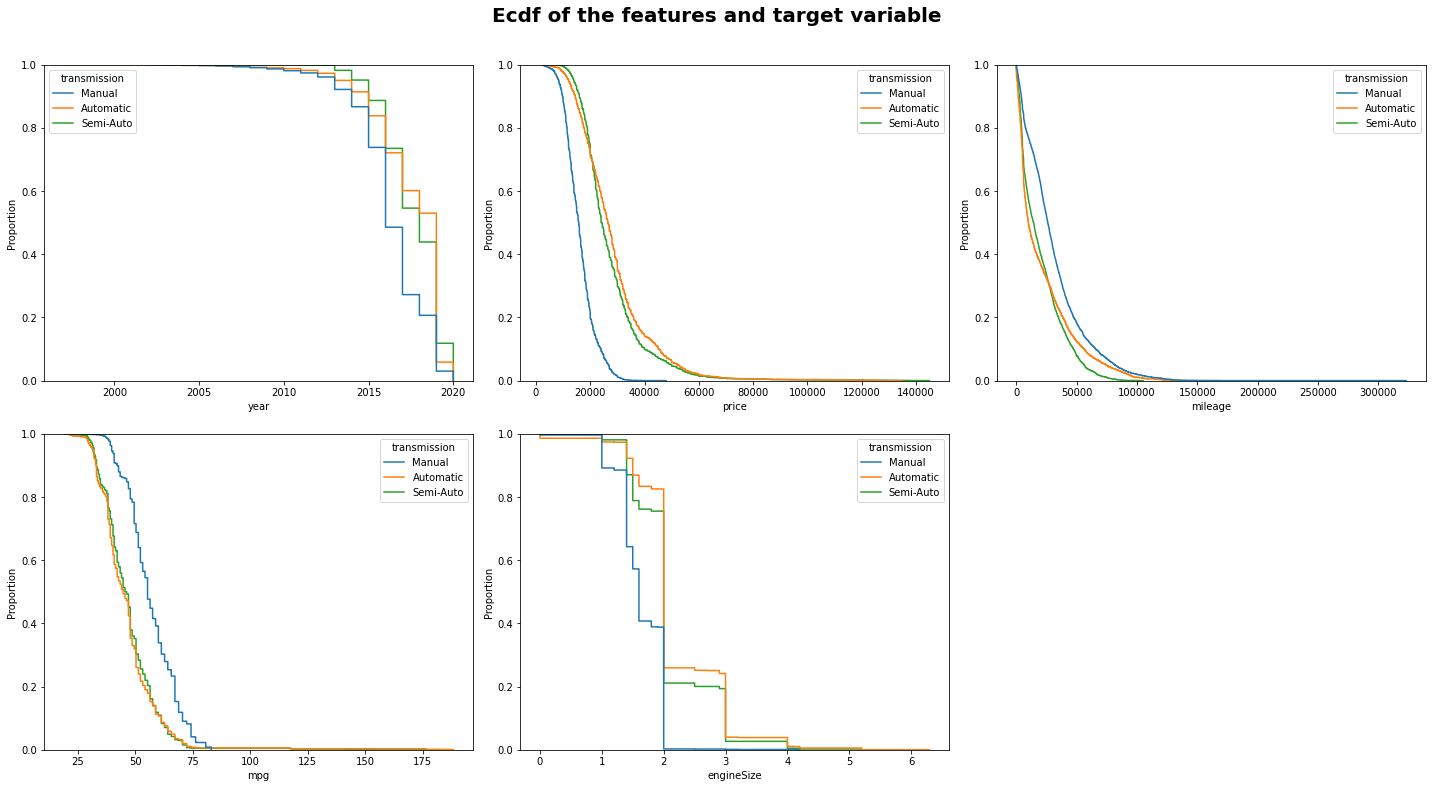

In [ ]:
plt.figure(figsize=(20,15))

for index in range(len(numeric_cols)):
    plt.subplot(3,3,index+1)
    sns.ecdfplot(x=df[numeric_cols[index]], data=df, complementary=True, hue="transmission")

plt.suptitle("Ecdf of the features and target variable",fontsize=20, y=1.04, fontweight=700)

plt.tight_layout(h_pad=1.8)
plt.show()

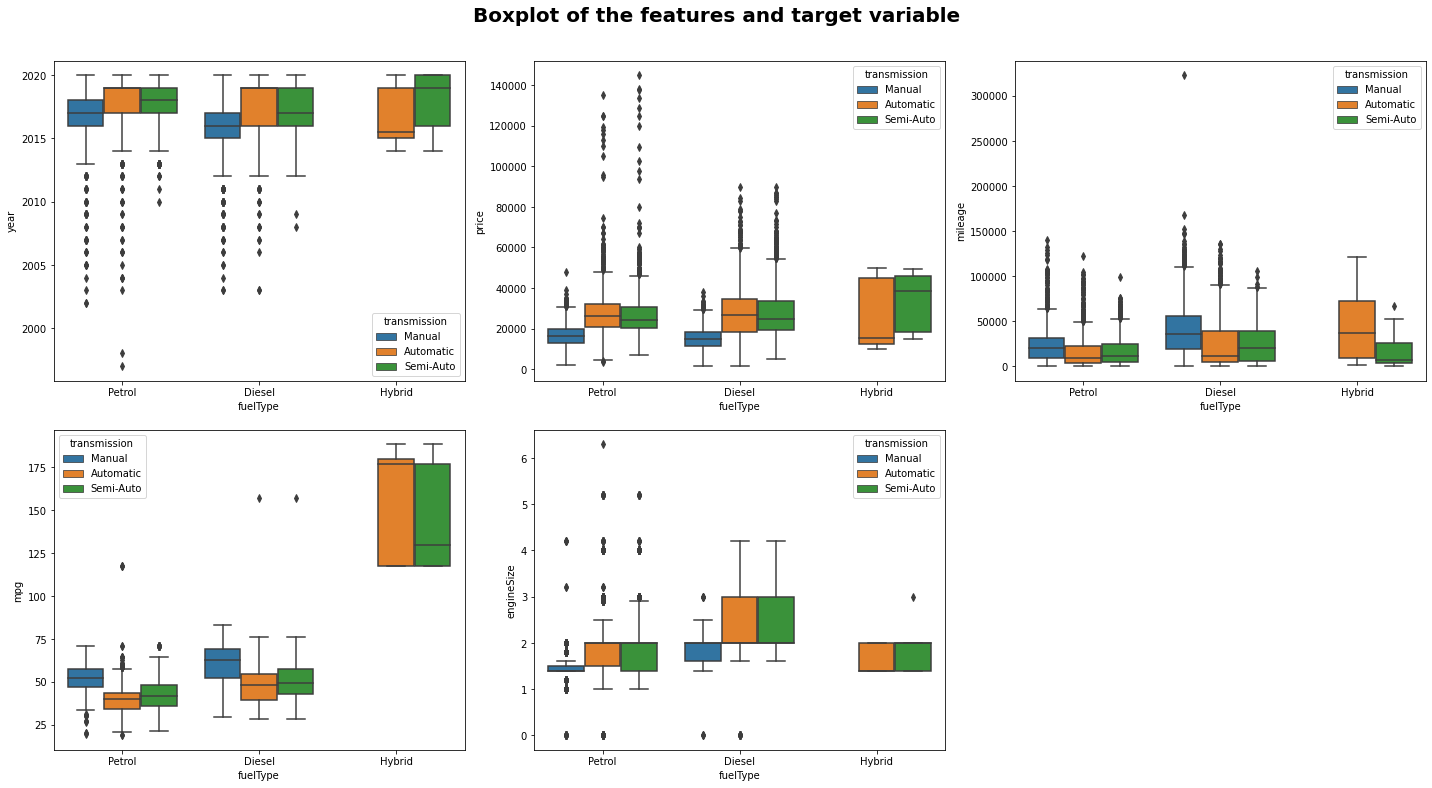

In [ ]:
plt.figure(figsize=(20,15))
for index in range(len(numeric_cols)):
    plt.subplot(3,3,index+1)
    sns.boxplot(data=df, y=df[numeric_cols[index]], x="fuelType", hue="transmission")

plt.suptitle("Boxplot of the features and target variable",fontsize=20, y=1.04, fontweight=700)

plt.tight_layout(h_pad=1.8)
plt.show()